In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import os
import importlib
import loop_analysis
importlib.reload(loop_analysis)
from loop_analysis import *

In [22]:
file_path = r"C:\Users\3Dstation3\Documents\3DMOKE\LoopTaking_20220907-171727.h5"

### Get the data and process the loop

#### Get the keys from the file

In [23]:
with h5py.File(file_path, 'r') as file:
    print(list(file.keys()))

['camera1', 'camera2', 'loops', 'stage']


C:\Users\3Dstation3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\3Dstation3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


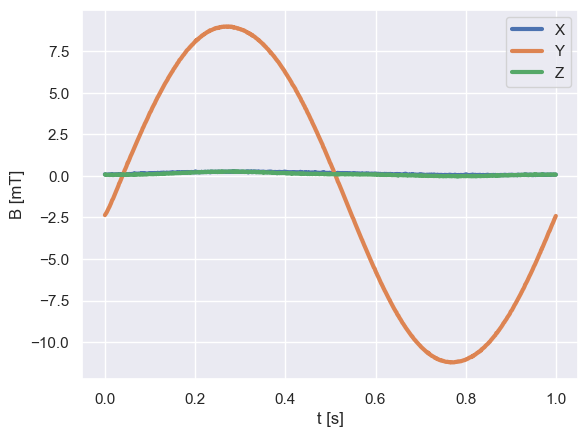

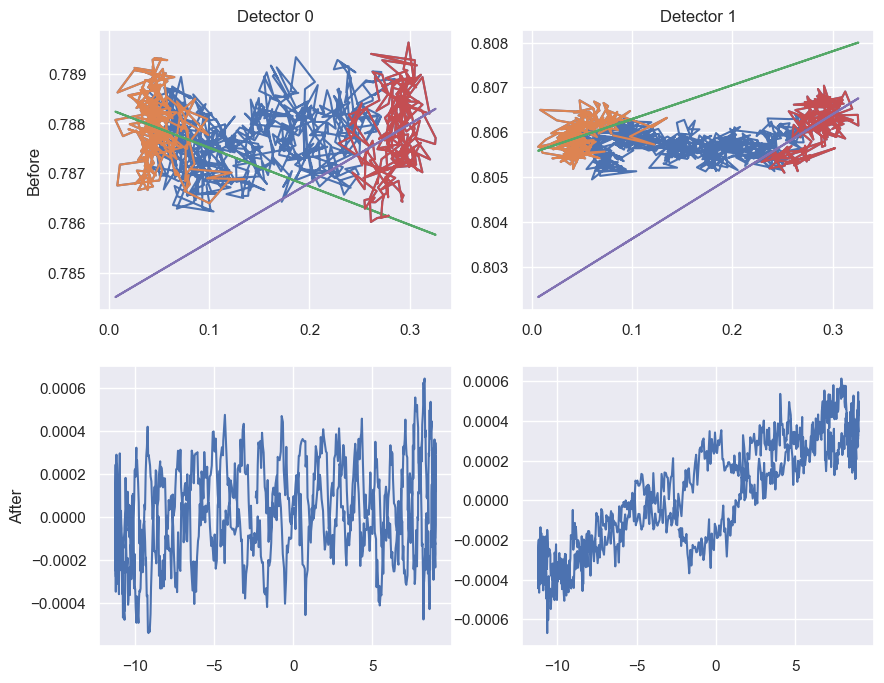

<Figure size 640x480 with 0 Axes>

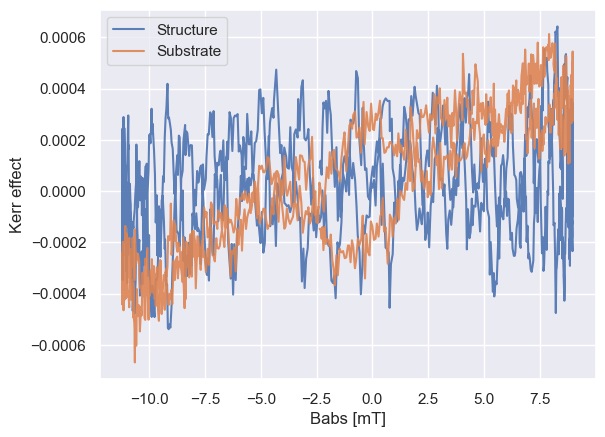

In [26]:
raw_data = get_file_data(file_path, group='loops')

averaged_data = get_averaged_loop(raw_data)
plot_fields(averaged_data)
data_kerr = get_kerr_signal(averaged_data.copy(), plot=True, cutoff=0.2)
plt.figure()
plot_moke(data_kerr)

### Get the derivative and find the switching points

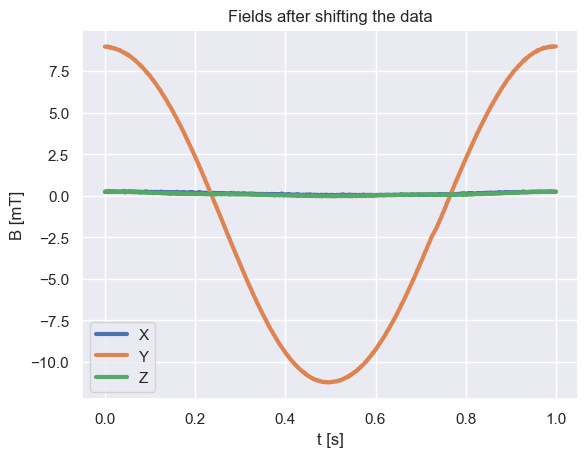

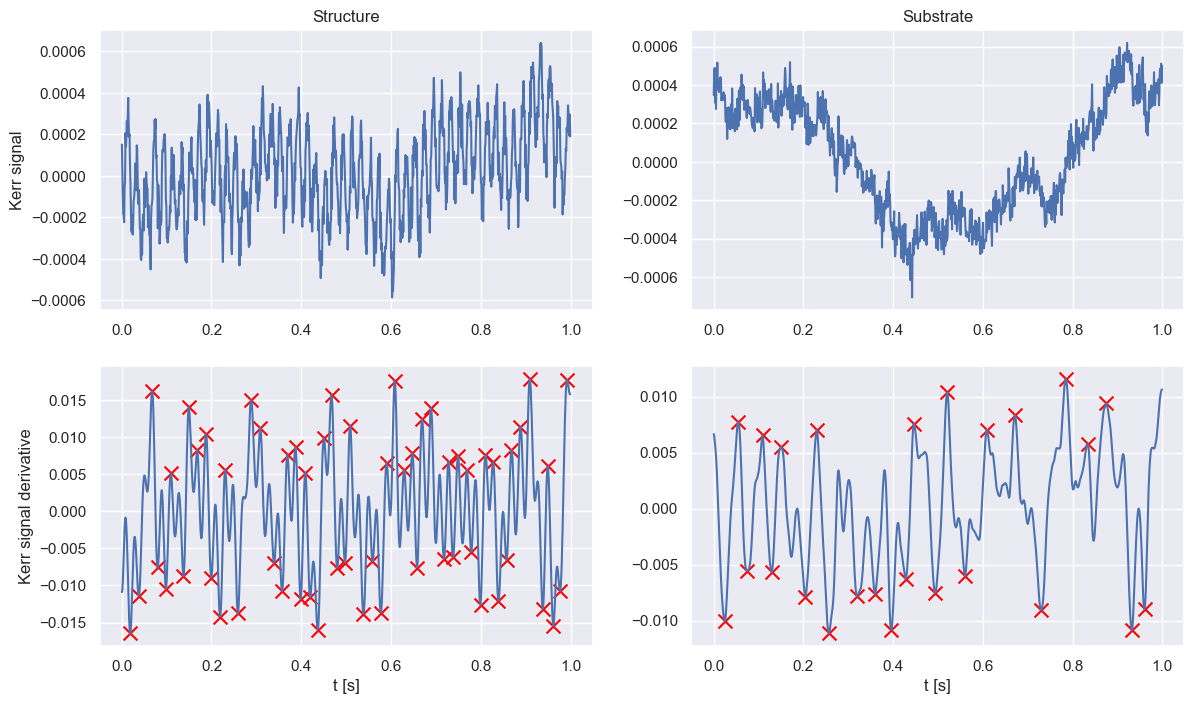

In [27]:
data_shifted = fft_shift(data_kerr)
plot_fields(data_shifted)
plt.title('Fields after shifting the data')
data_deriv, peaks = get_derivative(data_shifted)
plot_derivatives(data_deriv, peaks);
